# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, 1:-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 18) (846,)
(549, 18) (549,) (297, 18) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,91,46,78,148,61,9,147,45,19,152,168,323,199,70,13,11,189,200
1,91,36,83,162,61,8,142,47,19,128,163,298,137,63,0,31,193,200
2,100,48,95,209,68,7,199,32,23,150,216,605,200,73,7,11,192,194
3,100,46,104,184,60,9,197,34,23,147,222,578,198,73,13,13,189,197
4,83,46,73,137,59,6,148,45,19,146,167,327,183,75,8,0,185,191
5,98,38,66,130,55,7,130,51,18,138,160,251,123,69,3,12,191,194
6,88,44,84,135,55,12,155,44,20,158,176,351,164,75,7,11,183,195
7,90,48,78,143,60,11,161,43,20,159,172,374,186,75,2,2,184,193
8,102,45,85,193,64,6,192,33,22,146,217,570,163,76,6,7,195,193
9,86,40,62,140,62,7,150,45,19,133,165,330,173,82,2,3,180,185


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.553734,44.836066,81.979964,167.876138,61.515483,8.540984,168.380692,41.025501,20.542805,148.043716,187.836066,436.950820,174.116576,72.522769,6.489982,12.788707,188.865209,195.677596
std,8.212469,6.111083,15.866849,33.170363,7.585657,4.246151,32.749086,7.732485,2.541712,14.525899,30.329373,173.359915,31.942825,7.540277,4.971671,9.339256,6.264549,7.634193
min,77.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,319.000000,149.000000,67.000000,3.000000,5.000000,184.000000,190.000000
50%,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,177.000000,361.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,100.000000,49.000000,98.000000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,217.000000,584.000000,197.000000,76.000000,10.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,322.000000,133.000000,52.000000,261.000000,61.000000,28.000000,188.000000,280.000000,998.000000,268.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
dtypes: int32(18)
memory usage: 38.7 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
import scikitplot as skplt
sns.set(style="darkgrid")

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

**Note:** Normalizing the data. Before that, the first column was removed, since it was an ordinal column.

In [7]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
clf = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, fit_intercept=True)

c_values = np.logspace(-7, 2, 10)
penalty = ['l1', 'l2']

grid = dict(C=c_values, penalty=penalty)
grid_search_acur = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, scoring='accuracy')
logistic_best_acur = grid_search_acur.fit(X_train_scaled, y_train)
grid_search_f1 = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, scoring='f1_macro')
logistic_best_f1 = grid_search_f1.fit(X_train_scaled, y_train)

print("best params for accuracy = ", logistic_best_acur.best_params_)
print("best score for accuracy", logistic_best_acur.best_score_)
print("best params for f1 = ", logistic_best_f1.best_params_)
print("best score for f1", logistic_best_f1.best_score_)


best params for accuracy =  {'C': 100.0, 'penalty': 'l2'}
best score for accuracy 0.810558798999166
best params for f1 =  {'C': 100.0, 'penalty': 'l2'}
best score for f1 0.80941802157992


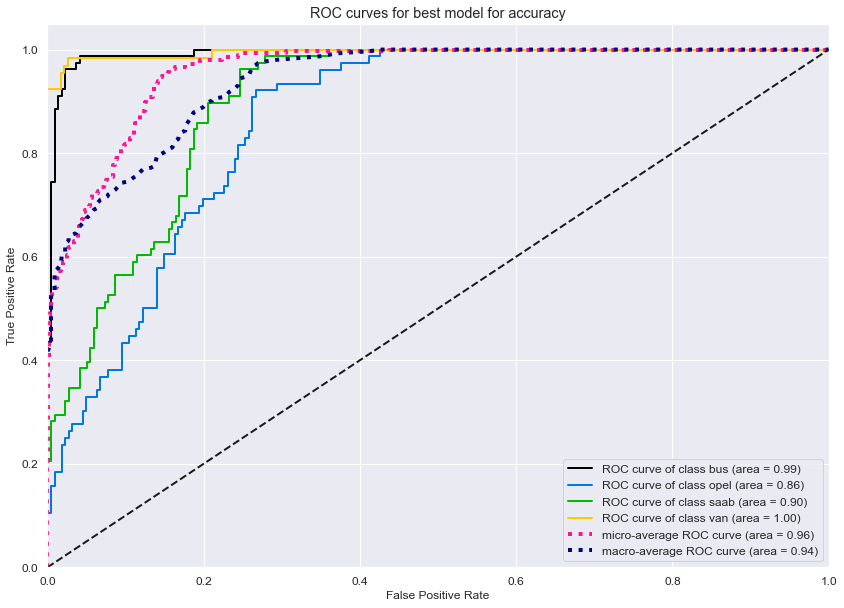

In [9]:
y_predicted_acur = logistic_best_acur.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, y_predicted_acur, figsize=(14, 10), title='ROC curves for best model for accuracy')
plt.show()

**Note:** the best roc_score for the van class, the worst is opel. Best params are $C = 100$ and $l_2$ penalty.

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

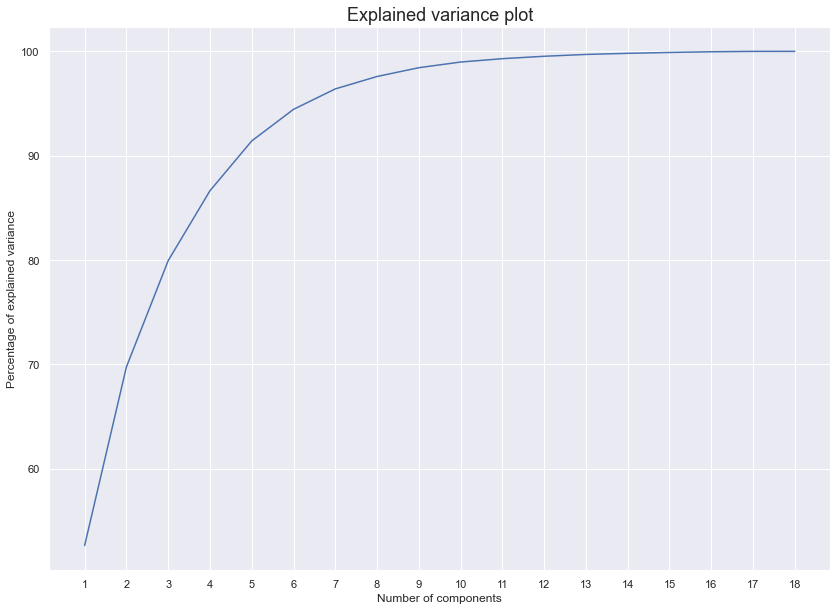

In [11]:
pca = PCA()
pca.fit(X_train_scaled)
plt.figure(figsize=(14, 10))
plt.xticks(np.arange(1, 19))
plt.title('Explained variance plot', fontsize=18)
plt.xlabel('Number of components')
plt.ylabel('Percentage of explained variance')
plt.plot(np.arange(1, 19), np.cumsum(pca.explained_variance_ratio_ ) * 100)
plt.show()

**Note:** Ten first components explaines aproximatly 99%.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [13]:
pca = PCA()
clf = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, fit_intercept=True)
normalizer = preprocessing.StandardScaler()
pipe = Pipeline(steps=[('norm', normalizer), 
                       ('pca', pca),
                       ('clf', clf)])
param_grid = {
    'pca__n_components': [5, 6, 7, 8, 10],
    'clf__C': np.logspace(-7, 2, 10),
    'clf__penalty': ['l1', 'l2']
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1, scoring='accuracy')
best_model = search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.734):
{'clf__C': 10.0, 'clf__penalty': 'l2', 'pca__n_components': 10}


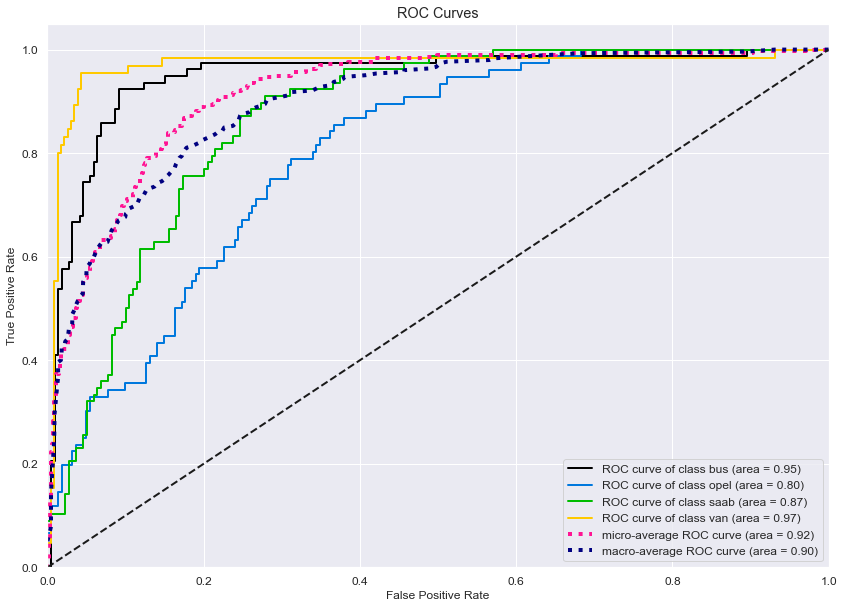

In [14]:
y_pred = best_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred, figsize=(14, 10))
plt.show()

**Note:** score came down from 0.81 to 0.73 when we left only 10 first components.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [15]:
from sklearn.tree import DecisionTreeClassifier

grid = dict(max_depth=np.arange(1, 21))
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, scoring='accuracy')
tree_best = grid_search.fit(X_train, y_train)
optimal_depth = tree_best.best_params_['max_depth']
print("best score = ", tree_best.best_score_)
print(tree_best.best_params_)

best score =  0.6939616346955797
{'max_depth': 13}


**Note:** optimal depth = 13.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [16]:
from sklearn.ensemble import BaggingClassifier
N = np.arange(2, 100, 5)
grid = dict(n_estimators=N)
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=optimal_depth), warm_start=True)
grid_search_acur = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, scoring='accuracy')
grid_search_f1 = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, scoring='f1_macro')
best_model_acur = grid_search_acur.fit(X_train, y_train)
best_model_f1 = grid_search_f1.fit(X_train, y_train)
print("best score for accuracy = ", best_model_acur.best_score_)
print("best params for accuracy = ", best_model_acur.best_params_)
print("best score for f1 = ", best_model_f1.best_score_)
print("best params for f1 = ", best_model_f1.best_params_)

best score for accuracy =  0.7595162635529608
best params for accuracy =  {'n_estimators': 17}
best score for f1 =  0.7514681543280586
best params for f1 =  {'n_estimators': 52}


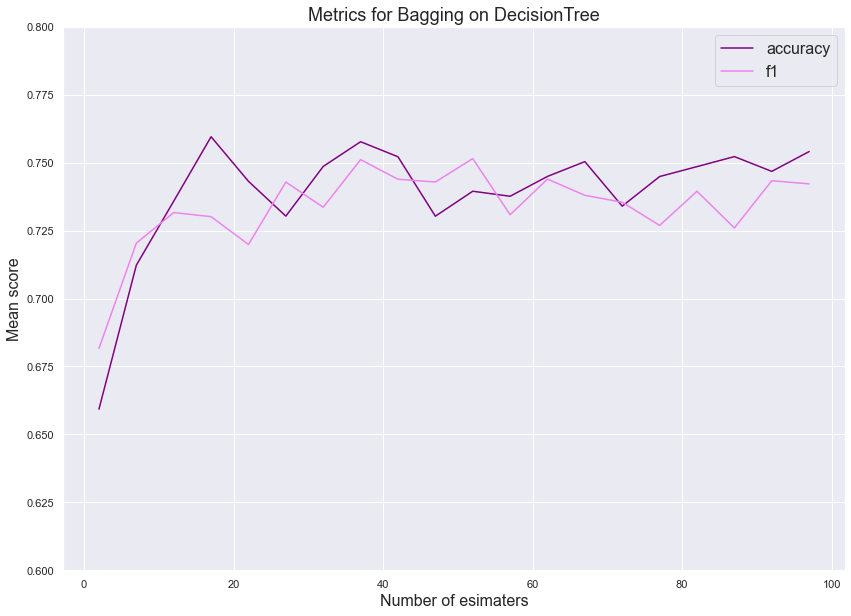

In [17]:
plt.figure(figsize=(14, 10))
plt.title('Metrics for Bagging on DecisionTree', fontsize=18)
plt.xlabel('Number of esimaters', fontsize=16)
plt.ylabel('Mean score', fontsize=16)
accuracy = grid_search_acur.cv_results_['mean_test_score']
f1 = grid_search_f1.cv_results_['mean_test_score']
plt.plot(N, accuracy, label='accuracy', color='purple')
plt.plot(N, f1, label='f1', color='violet')
plt.legend(fontsize=16)
plt.show()

**Note:** optimal number of estimators around 40. Tree depth can be bigger, because when we had only one tree it would be overfitting, but when we average we reduce the variance, and therefore less responsive to emissions.

In [19]:
from sklearn.ensemble import BaggingClassifier
N = np.arange(2, 100, 5)
grid = dict(n_estimators=N)
C = logistic_best_acur.best_params_['C']
penalty = logistic_best_acur.best_params_['penalty']
logistic = LogisticRegression(C=C, penalty=penalty, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, fit_intercept=True)
clf = BaggingClassifier(base_estimator=logistic, warm_start=True)
grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, refit='accuracy', scoring=['f1_macro', 'accuracy'])
best_model = grid_search.fit(X_train_scaled, y_train)

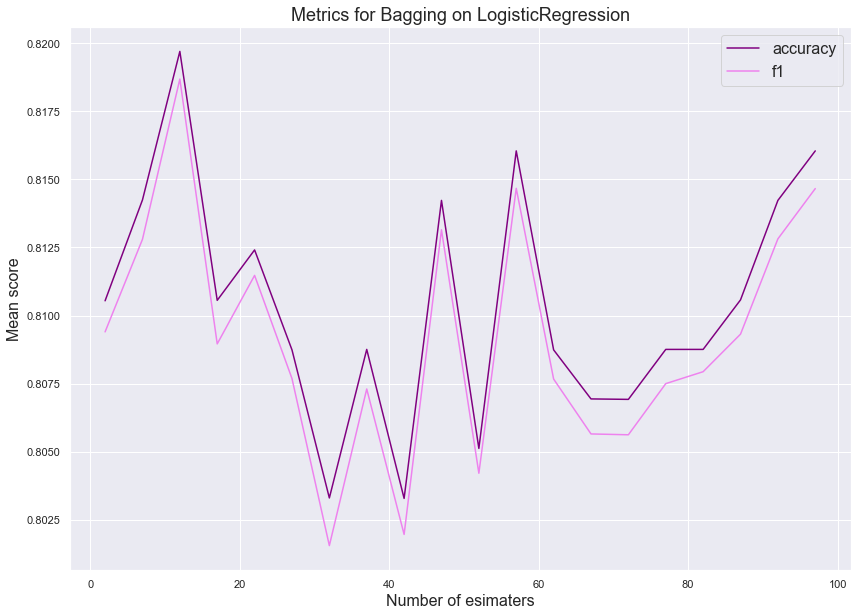

In [22]:
plt.figure(figsize=(14, 10))
plt.title('Metrics for Bagging on LogisticRegression', fontsize=18)
plt.xlabel('Number of esimaters', fontsize=16)
plt.ylabel('Mean score', fontsize=16)
accuracy = grid_search.cv_results_['mean_test_accuracy']
f1 = grid_search.cv_results_['mean_test_f1_macro']
plt.plot(N, accuracy, label='accuracy', color='purple')
plt.plot(N, f1, label='f1', color='violet')
plt.legend(fontsize=16)
plt.show()

**Note:** the accurancy for Logisctic Regression is higher and with less variance, because Logistic Regression is stable. There is no need in using bagging.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [23]:
from sklearn.ensemble import RandomForestClassifier

N = np.arange(2, 100, 5)
grid = dict(n_estimators=N)
clf = RandomForestClassifier()
grid_search_acur = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, scoring='accuracy')
grid_search_f1 = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, scoring='f1_macro')
rand_forest_best_acur = grid_search_acur.fit(X_train, y_train)
rand_forest_best_f1 = grid_search_f1.fit(X_train, y_train)
forest_est = rand_forest_best_acur.best_params_['n_estimators']
print("best score for accuracy = ", rand_forest_best_acur.best_score_)
print("best params for accuracy = ", rand_forest_best_acur.best_params_)
print("best score for f1 = ", rand_forest_best_f1.best_score_)
print("best params for f1 = ", rand_forest_best_f1.best_params_)

best score for accuracy =  0.7649874895746456
best params for accuracy =  {'n_estimators': 7}
best score for f1 =  0.7599033879560282
best params for f1 =  {'n_estimators': 27}


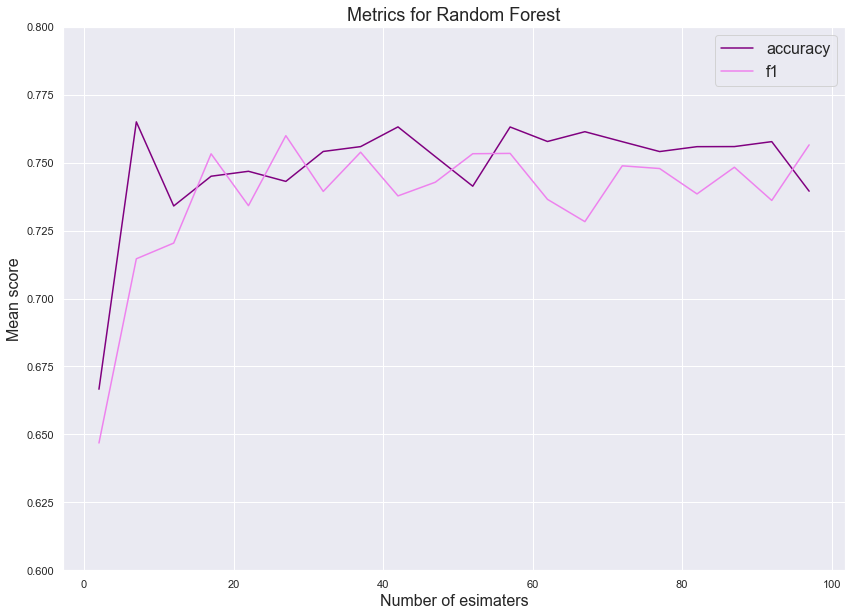

In [24]:
plt.figure(figsize=(14, 10))
plt.title('Metrics for Random Forest', fontsize=18)
plt.xlabel('Number of esimaters', fontsize=16)
plt.ylabel('Mean score', fontsize=16)
plt.ylim(top=0.8, bottom=0.6)
accuracy = grid_search_acur.cv_results_['mean_test_score']
f1 = grid_search_f1.cv_results_['mean_test_score']
plt.plot(N, accuracy, label='accuracy', color='purple')
plt.plot(N, f1, label='f1', color='violet')
plt.legend(fontsize=16)
plt.show()

**Note:** optimal number of estimators around 40. however forest is faster than bagging, because each tree learns only from a subset of features.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [25]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

X_splits = np.array_split(X_train, 10)
y_splits = np.array_split(y_train, 10)
size = [X_splits[i].shape[0] for i in range(10)]

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
C = logistic_best_acur.best_params_['C']
penalty = logistic_best_acur.best_params_['penalty']
logistic = LogisticRegression(C=C, penalty=penalty, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, fit_intercept=True)
tree = DecisionTreeClassifier(max_depth=optimal_depth)
forest = RandomForestClassifier(forest_est)

X, y = X_splits[0], y_splits[0]
logistic_acur, logistic_f1 = np.zeros(10), np.zeros(10)
tree_acur, tree_f1 = np.zeros(10), np.zeros(10)
forest_acur, forest_f1 = np.zeros(10), np.zeros(10)

for i in range(1, 11):
    logistic.fit(X, y)
    logistic_pred = logistic.predict(X_test)
    tree.fit(X, y)
    tree_pred = tree.predict(X_test)
    forest.fit(X, y)
    forest_pred = forest.predict(X_test)
    if i < 10:
        X = np.append(X, X_splits[i], axis=0)
        y = np.append(y, y_splits[i])
    logistic_acur[i - 1] = accuracy_score(y_test, logistic_pred)
    logistic_f1[i - 1] = f1_score(y_test, logistic_pred, average='macro')
    tree_acur[i - 1] = accuracy_score(y_test, tree_pred)
    tree_f1[i - 1] = f1_score(y_test, tree_pred, average='macro')
    forest_acur[i - 1] = accuracy_score(y_test, forest_pred)
    forest_f1[i - 1] = f1_score(y_test, forest_pred, average='macro')


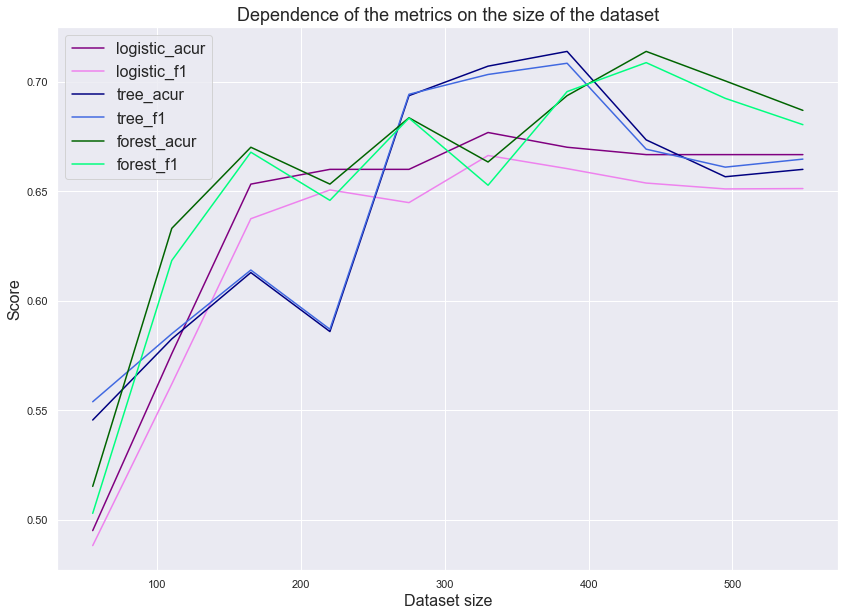

In [28]:
plt.figure(figsize=(14, 10))
plt.title('Dependence of the metrics on the size of the dataset', fontsize=18)
plt.xlabel('Dataset size', fontsize=16)
plt.ylabel('Score', fontsize=16)
N = np.cumsum(size)
plt.plot(N, logistic_acur, label='logistic_acur', color='purple')
plt.plot(N, logistic_f1, label='logistic_f1', color='violet')
plt.plot(N, tree_acur, label='tree_acur', color='navy')
plt.plot(N, tree_f1, label='tree_f1', color='royalblue')
plt.plot(N, forest_acur, label='forest_acur', color='darkgreen')
plt.plot(N, forest_f1, label='forest_f1', color='springgreen')
plt.legend(fontsize=16)
plt.show()

**Note:** for all estimators small dataset gets low accuracy. But also accuracy is not max when the dataset size max, for logistic regression the maximum around 330, for tree around 380, and for forest around 450. 